# The following section will be for the DSGE modelling section of the library.

In [7]:
# We need to import the class DSGEmodel from the file "main_solver" to manipulate
# use and manipulate our DSGE system.
from main_solver import DSGEmodel

# We need numpy to create the matrices that we will feed through to the class.
import numpy as np

# Define the exogenous parameters

In [8]:
N_bar     = 1.0/3.0
Z_bar     = 1.0
rho       = 0.36
delta     = 0.025
R_bar     = 1.01
eta       = 1.0
psi       = 0.95
exog_params = [N_bar, Z_bar, rho, delta, R_bar, eta, psi]

# Define the log-linearised equations that describe the system

This prototypical Real Business Cycle system can be found in "Indivisible Labor and Business Cycle", Hansen (1985).


In [9]:
beta   = 1.0/R_bar
YK_bar  = (R_bar + delta - 1)/rho
K_bar   = (YK_bar / Z_bar)**(1.0/(rho-1)) * N_bar
I_bar   = delta * K_bar
Y_bar   = YK_bar * K_bar
C_bar   = Y_bar - delta*K_bar
A       =  C_bar**(-eta) * (1 - rho) * Y_bar/N_bar
equations = [beta, YK_bar, K_bar, I_bar, Y_bar, C_bar, A]

# Define the input matrices to the solver, as per Uhlig (1999)

In [10]:
A_m = np.matrix([[0],
                 [-K_bar],
                 [0],
                 [0],
                 [0]])


B = np.matrix([[0],
               [(1-delta)*K_bar],
               [rho],
               [0],
               [- rho * YK_bar ]])

C = np.matrix([[-C_bar, Y_bar,   0,       0,       -I_bar],
               [0,       0,      0,        0,       I_bar],
               [0,      -1,     1-rho,     0,       0],
               [-eta,    1,     -1,        0,       0],
               [0, rho*YK_bar,    0,    - R_bar,    0 ]])

D = np.matrix([[0],
               [0],
               [1],
               [0],
               [0]])

F = np.matrix([[0]])

G = np.matrix([[0]])

H = np.matrix([[0]])

J = np.matrix([-eta,  0,  0,  1,  0])

K = np.matrix([eta,   0,  0,  0,  0])

L = np.matrix([[0]])

N = np.matrix([[psi]])

M = np.matrix([[0]])

# This line creates a dictionary containing all the matrices which can be easily passed to the class.
matrices = {"A": A_m, "B": B, "C": C, "D": D, "F": F, "G": G, "H": H, "J": J, "K": K, "L": L, "N": N, "M": M}

# These are the variable labels which shall be utilised to label the output graphs.
var_labels = ["Capital", "Consumption", "Output", "Labour", "Interest", "Investment", "Technology"]

# Instantiation a DSGE class, passing through the matrices and the variable names.

In [15]:
# Create an instance of DSGEmodel named "testmodel" with the previously defined matrices.
testmodel = DSGEmodel(matrices, var_labels=var_labels)

# Solving the system

In [16]:
# Calling the method "solve" uses the method outlined in Uhlig (1999) to solve for the
# coefficient matrices that help define the postulated linear law of equilibrium motion.
testmodel.solve()

# This method prints the solved matrices describing the solved system.
testmodel.print_solved_matrices(dp=1)

Success


# Simulate the model

Success
Capital
[6.505827068665789, 5.907734329484746, 5.306289619185542, 4.672914664288694, 4.051315494089853, 3.6071729402468695, 3.1533295718242047, 2.63761216351433, 2.12885400449762, 1.8886991929245345, 1.7291289347261272, 1.5298172520181321, 1.2727843993624066, 1.0238081701890456, 0.6425036961371198, 0.31730955284936835, -0.0021681603550727235, -0.37845686181953553, -0.7858145757292414, -1.1878628005792717, -1.4535210545355777, -1.6687670746993857, -2.0221349015095242, -2.224531088995762, -2.3577536560783856, -2.3459521005634585, -2.3119158368319757, -2.19077074022761, -2.3138697248264792, -2.485079847579942, -2.559123450536723, -2.575834592192463, -2.4863173221957835, -2.445220989323626, -2.523879592734829, -2.594750950676104, -2.7303994572800314, -2.846907756005497, -2.8757804658023423, -2.84537617274232, -2.8146925480912803, -2.8606464846606086, -2.8322895271200546, -2.752352392668315, -2.7066084288503025, -2.608382567609216, -2.567095134856472, -2.577574064150864, -2.56572244

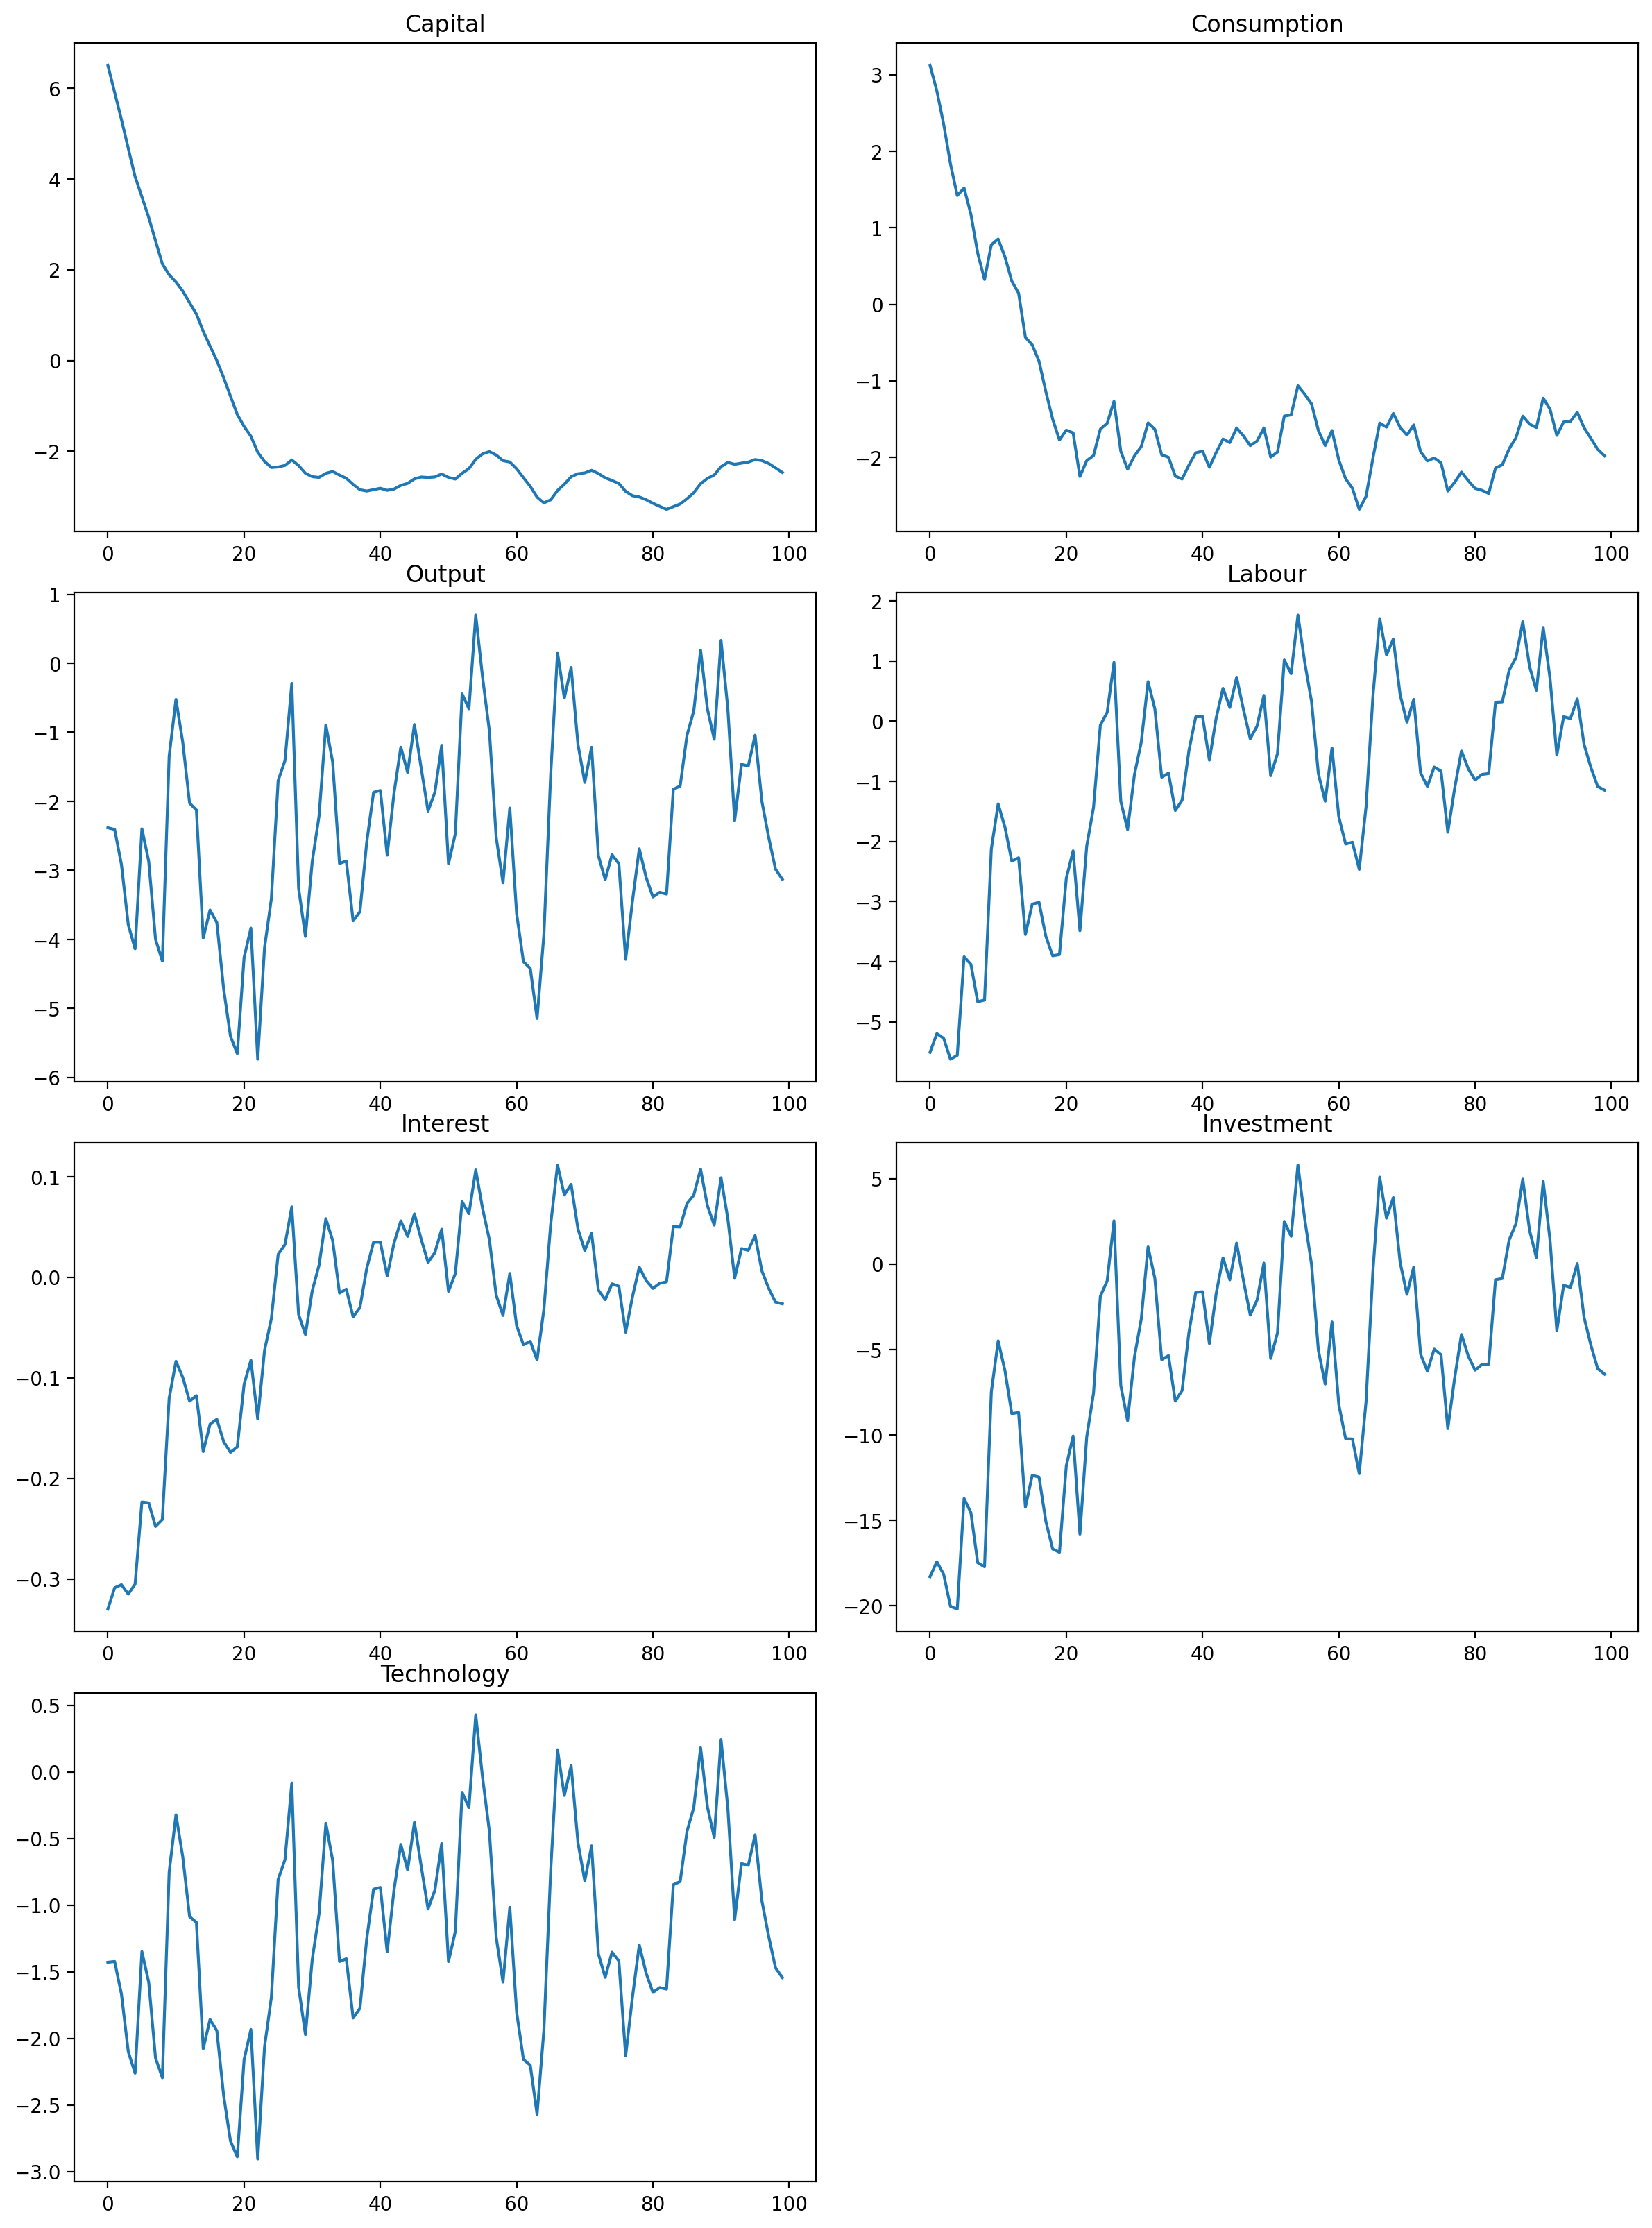

In [14]:
# This method utilises the previously calculated matrices from the "solve" method to simulate
# the system given a series of random shocks.
# The two tuples here denote the (location, size) of the random normal shock acting on the x and z state variables.
testmodel.simulate(periods=100, print_data=True, zshock=(0, 2), xshock=(6, 2))

# Impules response functions

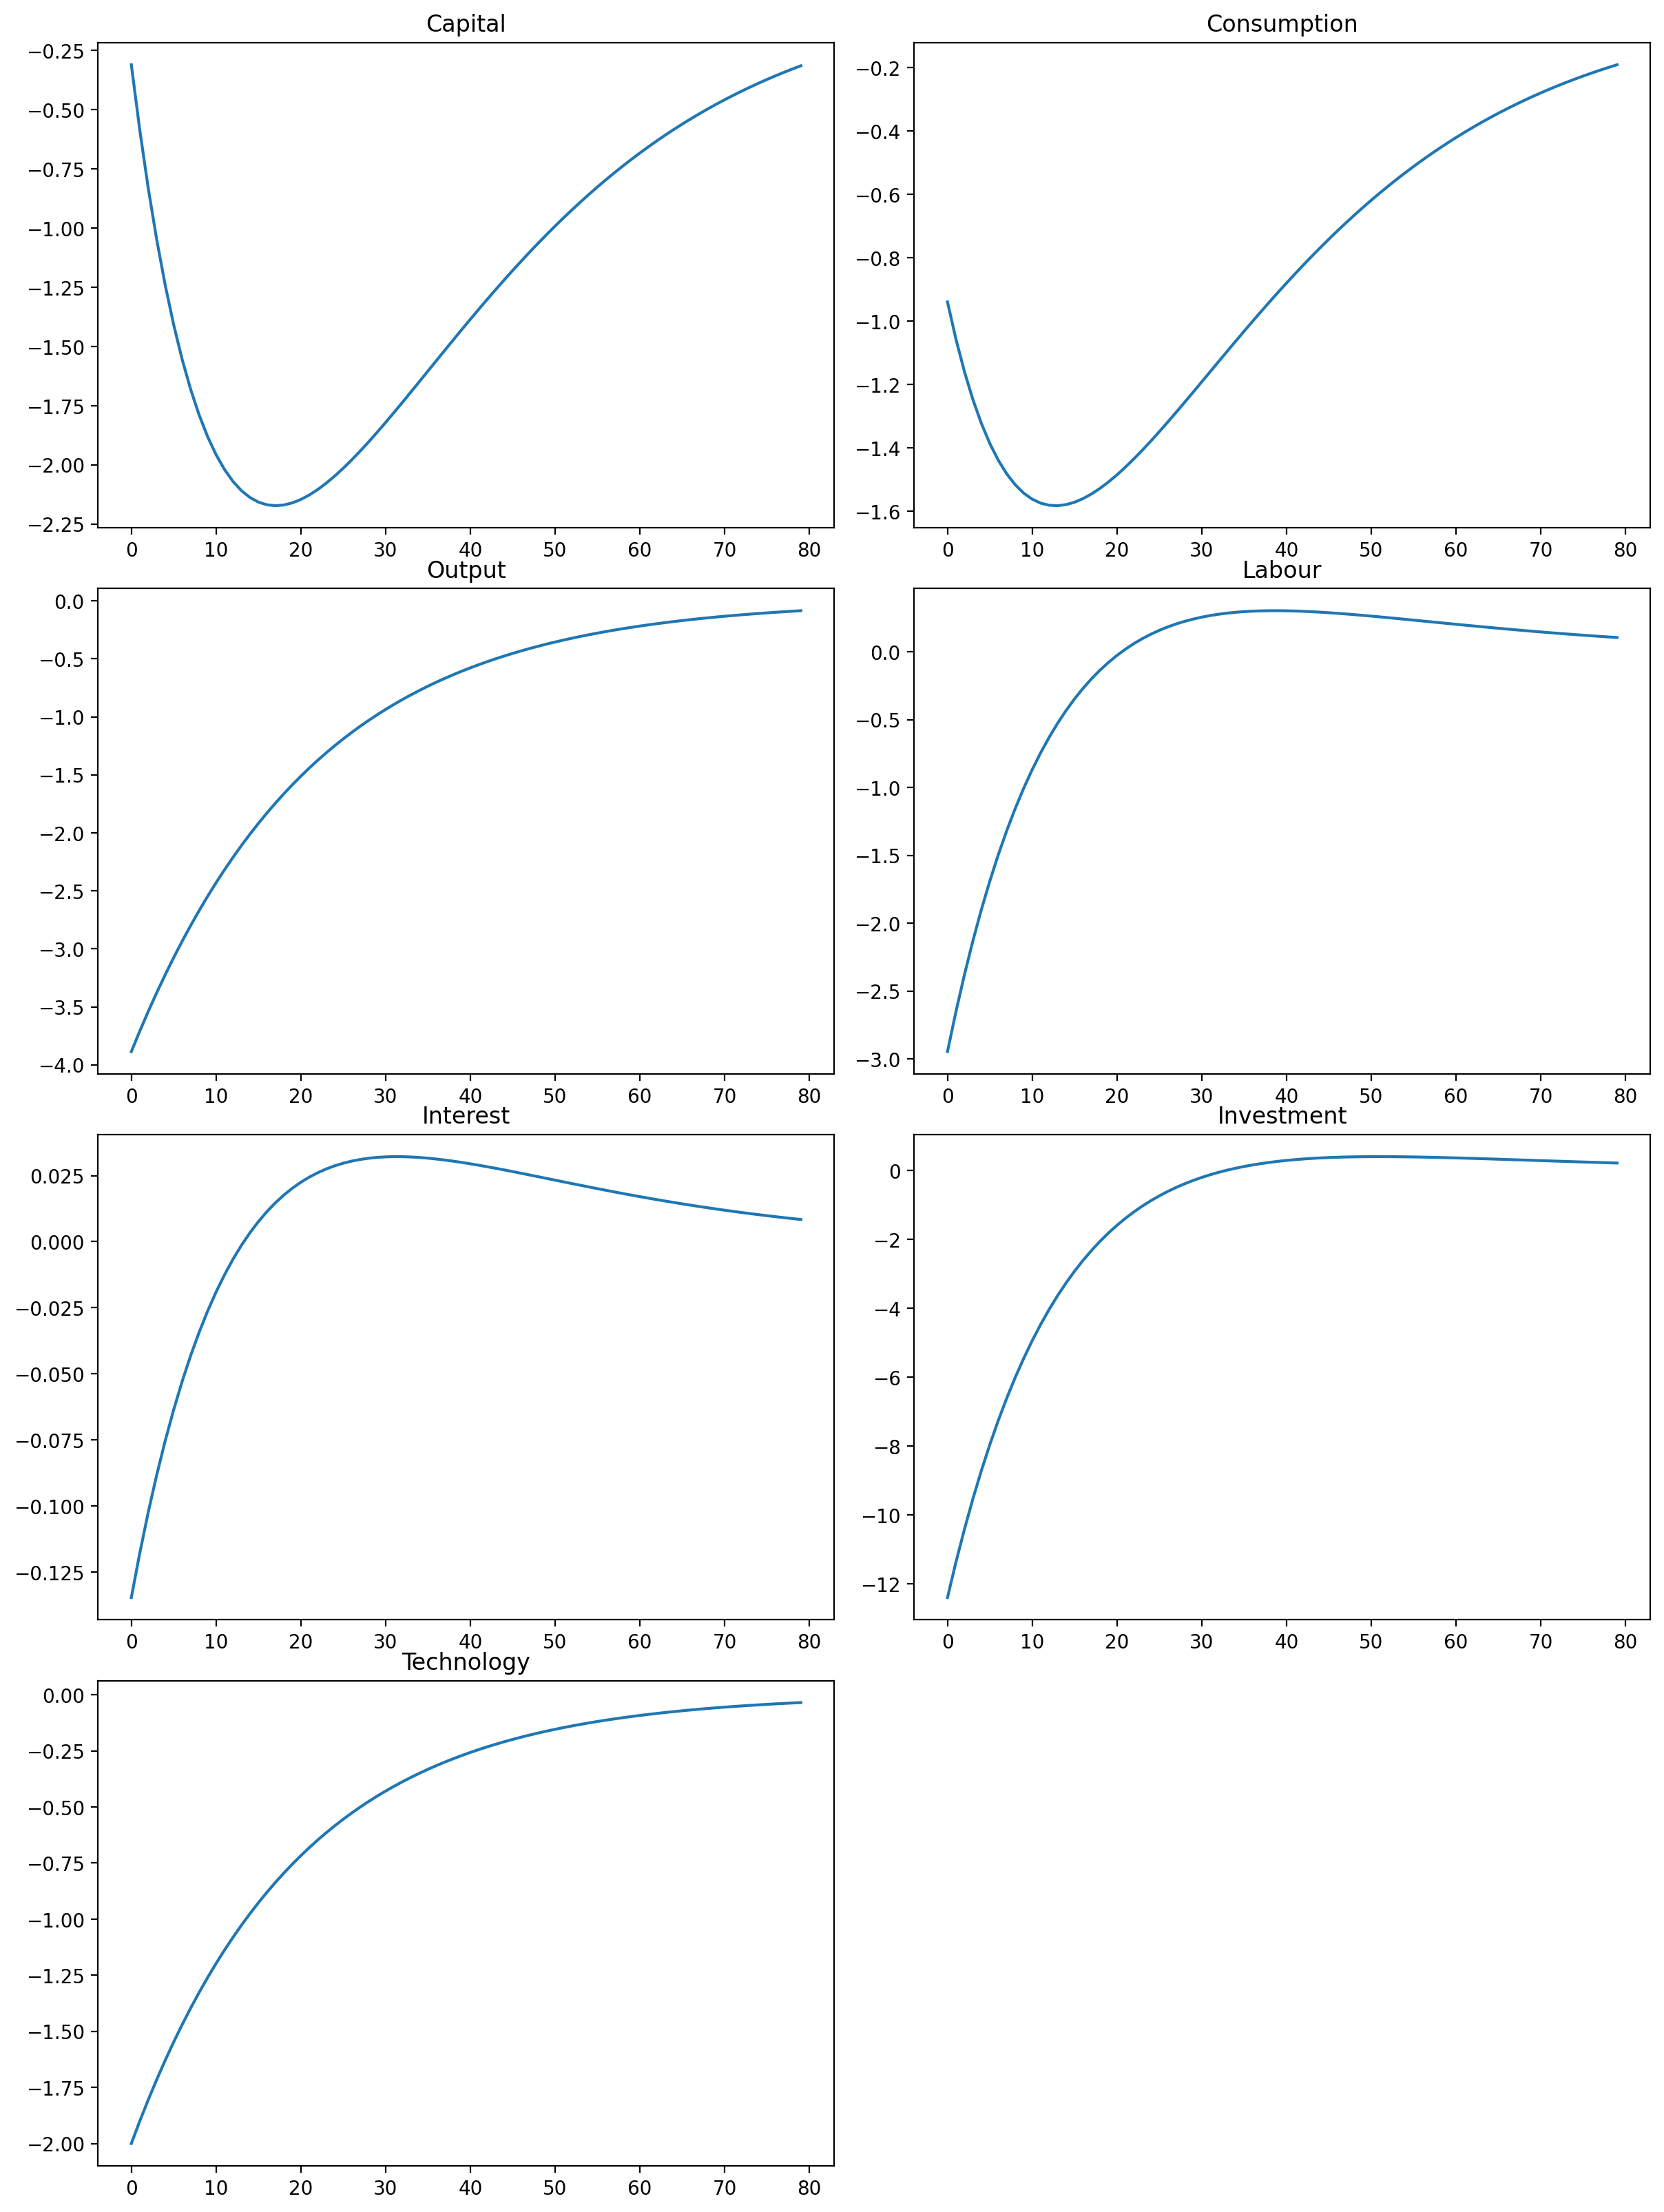

In [17]:
# This is a method which plots the impulse response functions for your solved system, given a size of shock.
# The method will ignore the size parameter and create a random normal shock given random=True.
testmodel.shock(periods=80, size=-2, random=False, print_data=False)

# Real Business Cycle Model Usage (Alpha Testing)

In [18]:
from main_solver import RBCmodel_steady_state

### In the first instance, the input equations shall be time-indexed.

In [22]:
# This defines a dictionary with the different equations, note that the same naming
# system must be used at all times given it is (currently) hard-coded.
endogenous_variables = {
    "l_supply": "(C_t**sigma) * (L_t**phi) - W_t/P_t",
    "k_accumulation": "K_tp1 - (1 - delta)*K_t - I_t",
    "k_demand": "(alpha*Y_t*P_t)/R_t - K_t",
    "l_demand": "((1 - alpha)*Y_t*P_t)/W_t - L_t",
    "equilibrium": "Y_t - C_t - I_t",
    "euler_eq": "beta*E_t*(R_tp1/P_tp1) + beta*(1 - delta) - (E_t*C_tp1/C_t)**sigma",
    "price_level": "(1/A_t)*((R_t/alpha)**alpha)*((W_t/(1 - alpha))**(1-alpha)) - P_t"
}

# Defining the exogenous parameters.
exog_params = {
    "alpha": 0.35,
    "beta": 0.985,
    "sigma": 2.0,
    "phi": 1.5,
    "delta": 0.025,
}

# Instantiation of the RBC class

In [24]:
# Create an instance called "RBCmodel", selecting the exogenous and endogenous dictionaries,
# the number of decimal points to round to, and whether the equation system is in steady-state format.
RBCmodel = RBCmodel_steady_state(endogenous_variables=endogenous_variables, exog_parmas=exog_params, round_int=3, _ss=False)

# This method prints the steady-state equations that it has derived.
RBCmodel.print_equations()

# This method prints the output of the calculation of the steady-state values, as a dictionary.
print(RBCmodel.calc_steady_state())

Initialising variables...
 –    (C_ss**sigma) * (L_ss**phi) - W_ss/1
 –    K_ss - (1 - delta)*K_ss - I_ss
 –    (alpha*Y_ss*1)/R_ss - K_ss
 –    ((1 - alpha)*Y_ss*1)/W_ss - L_ss
 –    Y_ss - C_ss - I_ss
 –    beta*1*(R_ss/1) + beta*(1 - delta) - (1*C_ss/C_ss)**sigma
 –    (1/1)*((R_ss/alpha)**alpha)*((W_ss/(1 - alpha))**(1-alpha)) - 1
{'C': 1.829, 'L': 0.729, 'K': 20.338, 'I': 0.508, 'Y': 2.338, 'W': 2.084, 'R': 0.04}


## Steady-state version

In [26]:
# This system is already in its steady-state format, necessitating that _ss = True.

endogenous_variables = {
    "l_supply": "(C_ss**sigma) * (L_ss**1.5) - W_ss",
    "k_accumulation": "0.025*K_ss - I_ss",
    "k_demand": "(0.35*Y_ss)/R_ss - K_ss",
    "l_demand": "(0.65*Y_ss)/W_ss - L_ss",
    "equilibrium": "Y_ss - C_ss - I_ss",
    "euler_eq": "beta*R_ss + 0.960375 - 1",
    "price_level": "1.91065600085225*(R_ss**0.35)*(W_ss**0.65) - 1"
}

exog_params = {
    "alpha": 0.35,
    "beta": 0.985,
    "sigma": 2.0,
    "phi": 1.5,
    "delta": 0.025,
}

model_test2 = RBCmodel_steady_state(endogenous_variables, exog_params, _ss=True)
model_test2.print_equations()
print(model_test2.calc_steady_state())

Initialising variables...
 –    (C_ss**sigma) * (L_ss**1.5) - W_ss
 –    0.025*K_ss - I_ss
 –    (0.35*Y_ss)/R_ss - K_ss
 –    (0.65*Y_ss)/W_ss - L_ss
 –    Y_ss - C_ss - I_ss
 –    beta*R_ss + 0.960375 - 1
 –    1.91065600085225*(R_ss**0.35)*(W_ss**0.65) - 1
{'C': 1.829, 'L': 0.729, 'K': 20.338, 'I': 0.508, 'Y': 2.338, 'W': 2.084, 'R': 0.04}
